# Problem 2

\begin{alignat*}{1}\min\quad & -x_{1} - 3 x_{2}\\
\text{Subject to} \quad & 2 x_{1} + 3 x_{2} \leq 6\\
 & -x_{1} + 4 x_{2} \leq 4\\
 & x_{i} \geq 0 \quad\forall i \in \{1,2\}\\
\end{alignat*}


In [5]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, x[1:2] >= 0)
@constraint(m, 2*x[1] + 3*x[2] <= 6)
@constraint(m, -x[1] + 4*x[2] <= 4)

@objective(m,Min,-x[1]-3*x[2])

solve(m)

println("(x1,x2) = (", getvalue(x),")")



(x1,x2) = ([1.09091, 1.27273])


# Problem 3

\begin{alignat*}{1}\min\quad & x_{1}^2 + 2 x_{2}^2\\
\text{Subject to} \quad & x_{1} + x_{2} = 2\\
 & x_{i} \quad\forall i \in \{1,2\}\\
\end{alignat*}

In [6]:
using JuMP, Ipopt

m = Model(solver = IpoptSolver(print_level= 0))
@variable(m, x[1:2])
@constraint(m, x[1] + x[2] -2 == 0)
@objective(m,Min,x[1]^2 + 2*x[2]^2)

display(m)
solve(m)

println("(x1,x2) = ", getvalue(x))

Minimization problem with:
 * 1 linear constraint
 * 2 variables
Solver is Ipopt

(x1,x2) = [1.33333, 0.666667]


# Problem 4
\begin{alignat*}{1}\min\quad & x_{1} + 2 x_{2}\\
\text{Subject to} \quad & x_{1}^2 + x_{2}^2 - 1 \leq 0\\
 & x_{i} \quad\forall i \in \{1,2\}\\
\end{alignat*}

In [7]:
using JuMP, Gurobi

m = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(m, x[1:2])
@constraint(m, sum(x.^2) <= 1)

@objective(m,Min,x[1]+2*x[2])
solve(m)

println("(x1,x2) = ", getvalue(x))


Academic license - for non-commercial use only
(x1,x2) = [-0.447214, -0.894427]


# Problem 5
\begin{alignat*}{1}\min\quad & sin(x_{1} + 1.0) * cos(x_{2} + 1.0) + sin(2.0 * (x_{1} + 1.0) * (x_{2} + 1.0))\\
\text{Subject to} \quad & -3 \leq x_{i} \leq 3 \quad\forall i \in \{1,2\}\\
\end{alignat*}

In [8]:
using JuMP, Ipopt

m = Model(solver = IpoptSolver(print_level=0, print_frequency_iter=1))
@variable(m, -3 <= x[1:2]<= 3)
@NLobjective(m, Min, sin(x[1]+1)cos(x[2]+1)+sin(2*(x[1]+1)*(x[2]+1)))
setvalue(x,[-1,-1])
display(m)
solve(m)
println("(x1, x2) =", getvalue(x))
println("Optimal Value = ", getobjectivevalue(m))

Minimization problem with:
 * 0 linear constraints
 * 2 variables
Solver is Ipopt

(x1, x2) =[-2.68674, -0.570783]
Optimal Value = -1.895651431480283


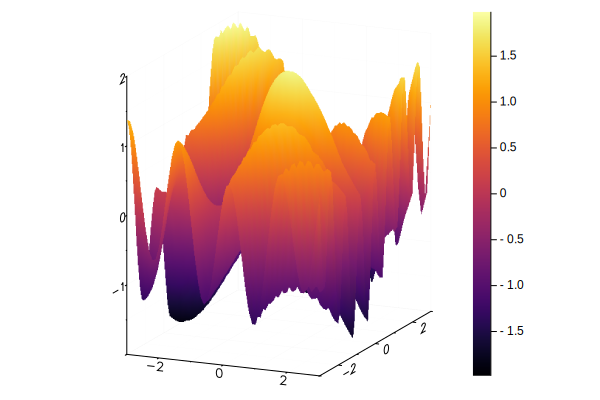

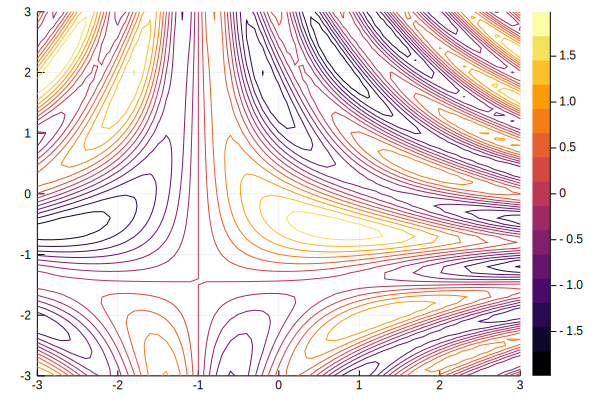

In [10]:
using Plots
#f(x) = sin(x[1])cos(x[2])+sin(2*x[1]*x[2])
f(x) = sin(x[1]+1)cos(x[2]+1)+sin(2*(x[1]+1)*(x[2]+1))
g(x,y) = f([x,y])
X = -3:0.1:3
l = @layout [a{0.5w} b]
p = plot(X, X, g, st = :surface) #, :contour], layout = l)
display(p)
#p = plot(X, X, f, st = [:surface, :contour], layout = l)
#disply(p)
p = plot(X, X, g, st = :contour)

Observe that this problem is non-convex.  Thus, ideally, we would use a global optimization solver to find the optimal solution.  Observe in the plot below that differnt starting solutions lead to different local minima when using IPOPT.

Optimal Value = -1.7114855885900135   (x1, x2) =[-0.163941, 1.88556]
Optimal Value = -1.895651431480283   (x1, x2) =[-2.68674, -0.570783]
Optimal Value = -1.130725616920014   (x1, x2) =[1.93524, 3.0]
Optimal Value = -1.895651431480283   (x1, x2) =[-2.68674, -0.570783]
Optimal Value = -1.7424291209836285   (x1, x2) =[3.0, -1.19407]
Optimal Value = -0.3590443050244251   (x1, x2) =[-2.76916, 3.0]
Optimal Value = -1.1638288209628078   (x1, x2) =[-0.583479, -3.0]
Optimal Value = -1.3852435882202472   (x1, x2) =[0.953774, -3.0]
Optimal Value = -0.6746390947590954   (x1, x2) =[-3.0, 0.909473]
Optimal Value = -1.3696139609380338   (x1, x2) =[-3.0, -2.12642]
Optimal Value = -0.4575544742057641   (x1, x2) =[-1.97602, 3.0]


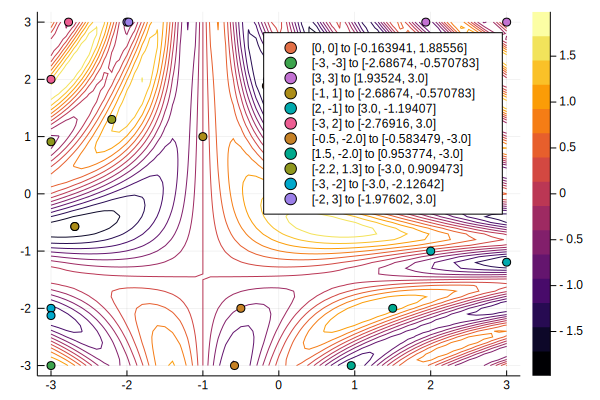

In [11]:
function optimize_and_plot(initial_x)
    m = Model(solver = IpoptSolver(print_level=0, print_frequency_iter=1))
    @variable(m, -3 <= x[1:2]<= 3)
    @NLobjective(m, Min, sin(x[1]+1)cos(x[2]+1)+sin(2*(x[1]+1)*(x[2]+1)))
    setvalue(x,initial_x)
    solve(m)
    sol_x = getvalue(x)
    println( "Optimal Value = ", getobjectivevalue(m), "   (x1, x2) =", getvalue(x))
    scatter!([initial_x[1], sol_x[1]], [initial_x[2], sol_x[2]], label = "$initial_x to $sol_x")
end

using Plots
#f(x) = sin(x[1])cos(x[2])+sin(2*x[1]*x[2])
f(x) = sin(x[1]+1)cos(x[2]+1)+sin(2*(x[1]+1)*(x[2]+1))
g(x,y) = f([x,y])
X = -3:0.1:3
p = plot(X, X, g, st = :contour)

optimize_and_plot([0,0])
optimize_and_plot([-3,-3])
optimize_and_plot([3,3])
optimize_and_plot([-1,1])
optimize_and_plot([2,-1])
optimize_and_plot([-3,2])
optimize_and_plot([-0.5,-2])
optimize_and_plot([1.5,-2])
optimize_and_plot([-2.2,1.3])
optimize_and_plot([-3,-2])
optimize_and_plot([-2,3])



# Problem 6

(a) The model of this problem is as above. The objective is to minimize the sum of distance.


In [20]:
using JuMP, Ipopt

m = Model(solver = IpoptSolver(print_level=0, print_frequency_iter=1))

# Define variables
@variable(m, -2 <= x[1:4]<= 10)
@variable(m, -3 <= y[1:4]<= 6)
@variable(m, -2 <= x0 <= 10)
@variable(m, -3 <= y0 <= 6)
@variable(m, 0 <= w[1:4]<= 14)

# Define objective 
@objective(m, Min, sum(w))

# Define circle constraints
@NLconstraint(m,(x[1]-0)^2+(y[1]-4)^2 <= 4)
@NLconstraint(m,(x[2]-9)^2+(y[2]-5)^2 <= 1)

# Define rectangular constraints
@constraint(m, 6 <= x[3] <= 8)
@constraint(m, -2 <= y[3] <= 2)
@constraint(m, 1 <= x[4] <= 3)
@constraint(m, -3 <= y[4] <= -1)

# Define distance constraints
@NLconstraint(m, constraint[i in 1:4], (x[i]-x0)^2+(y[i]-y0)^2 <= w[i]^2)

display(m)

Minimization problem with:
 * 4 linear constraints
 * 6 nonlinear constraints
 * 14 variables
Solver is Ipopt

(b) From the above formulation, the objective function and constaints are both convex. Hence, it is a convex problem.

In [22]:
solve(m)

:Optimal

In [23]:
println("(x0,y0) = (", getvalue(x0), "  ", getvalue(y0),")")

(x0,y0) = (5.999905076092232  2.000031632269259)


(c) The optimal solution is x0 = 5.999905076092232 and y0 =  2.000031632269259)

# Problem 7
## (a) 

The model used to solve this problem is given as follows:
\begin{equation}
    \begin{array}{lll}
        \text{max} & w\\
        & w^2 \le (x-a_i)^2 + (y-b_i)^2 &: i \in \{1,2,3,4\}\\
        & 0 \le y \le 10\\
        & 0 \le 3x-y \le 30
    \end{array}
\end{equation}

## (b) 

The problem as formulated above is non-convex, as the constraints involving $w$ form the hypograph of the convex, non-concave function $\|(x,y)-(a_i,b_i)\|_2$. For any fixed values of $(x,y)$, indeed, $w$ will be the minimum of four convex nonlinear functions of $x$ and $y$, resulting in a non-convex, non-concave function in $x$ and $y$.

Indeed, moving in the region on the line containing any two towers, $w$ will decrease while moving towards the first tower, then increase until the midpoint is reached, then decrease to the second tower, then increase again to the boundary (assuming another tower does not become the closest anywhere on the line, in which case additional increasing and decreasing regions will appear along the line). Thus, the fixed-$(x,y)$ solution is non-convex along some line in the domain, and is thus non-convex in general.

## (c)
The presented software solution is given using Ipopt.

In [26]:
using JuMP, Ipopt
# locations of cell phones
a = [1,3,7,8];
b = [1,6,2,5];
m = Model(solver = IpoptSolver(print_level = 0))

# Define variables
@variable(m, x)
@variable(m, 0 <= y <= 10)
@variable(m,  w)

# Define objective 
@objective(m, Max, w)

# Define rectangular constraints
@constraint(m, 0 <= 3*x-y <= 30)

# Define distance constraints
@NLconstraint(m, constraint[i in 1:4], (a[i]-x)^2+(b[i]-y)^2 >= w^2)

display(m)
solve(m)

Maximization problem with:
 * 1 linear constraint
 * 4 nonlinear constraints
 * 3 variables
Solver is Ipopt

:Optimal

In [30]:
println("(w) = (", getvalue(w) ,")")
println("(x,y) = ", [getvalue(x), getvalue(y)])

(w) = (1.4142135701665848)
(x,y) = [-2.22982e-9, 0.0]


# This did not return the correct answer!!


Optimal Value = 1.4142135701665848   (x1, x2) =[-2.22982e-9, 0.0]
Optimal Value = 3.6055513553083687   (x1, x2) =[10.0, 0.0]
Optimal Value = 5.249761981945416   (x1, x2) =[6.4, 10.0]
Optimal Value = 3.308924228823535   (x1, x2) =[3.78571, 2.78571]
Optimal Value = 3.400367625666522   (x1, x2) =[4.25, 0.0]
Optimal Value = 7.310570891983714   (x1, x2) =[13.3333, 10.0]


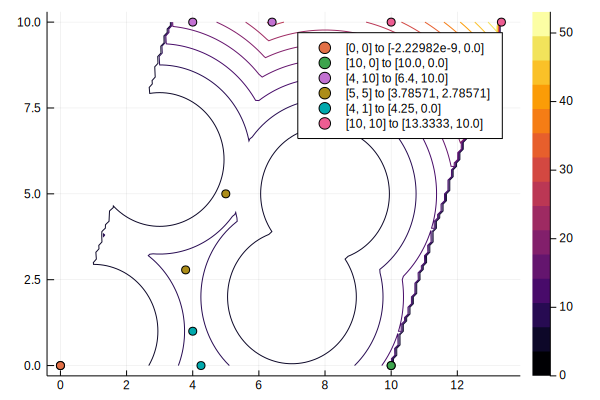

In [63]:

function optimize_and_plot_new(initial_x)
    # locations of cell phones
A = [1,3,7,8];
B = [1,6,2,5];
m = Model(solver = IpoptSolver(print_level = 0))

# Define variables
@variable(m, x)
@variable(m, 0 <= y <= 10)
@variable(m,  w)

# Define objective 
@objective(m, Max, w)

# Define rectangular constraints
@constraint(m, 0 <= 3*x-y <= 30)

# Define distance constraints
@NLconstraint(m, constraint[i in 1:4], (A[i]-x)^2+(B[i]-y)^2 >= w^2)
    setvalue(x, initial_x[1])
    setvalue(y, initial_x[2])
    solve(m)
    sol_x = [getvalue(x),getvalue(y)]
    println( "Optimal Value = ", getobjectivevalue(m), "   (x1, x2) =", [getvalue(x),getvalue(y)])
    scatter!([initial_x[1], sol_x[1]], [initial_x[2], sol_x[2]], label = "$initial_x to $sol_x")
end

A = [1,3,7,8];
B = [1,6,2,5];
using Plots
distance(x,a,b) = (a-x[1])^2+(b-x[2])^2
distance_MAX(x,A,B) = minimum([distance(x,A[i],B[i]) for i in 1:length(A)])
indicator(x,y) = ( y <= 10)*(0 <= x)*(0 <= y)*(0 <= 3*x - y)*(3*x - y <= 30)
g(x,y) = distance_MAX([x,y], A,B)*indicator(x,y)
X = 0:0.1:13.5
Y = 0:0.1:10
p = plot(X, Y, g, st = :contour)

optimize_and_plot_new([0,0])
optimize_and_plot_new([10,0])
optimize_and_plot_new([4,10])
optimize_and_plot_new([5,5])
optimize_and_plot_new([4,1])
optimize_and_plot_new([10,10])


## The optimal solution seeems to be
Optimal Value = 7.310570891983714   (x1, x2) =[13.3333, 10.0]